In [65]:
import numpy as np
import pandas as pd

In [66]:
data=pd.read_csv('bankloan.csv')

In [67]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176.0,9.3,11.36,5.01,1
1,27,1,10,6,31.0,17.3,1.36,4.00,0
2,40,1,15,14,55.0,5.5,0.86,2.17,0
3,41,1,15,14,120.0,2.9,2.66,0.82,0
4,24,2,2,0,28.0,17.3,1.79,3.06,1


In [68]:
data1=data.drop(['ed','default'],axis=1)

In [69]:
data1.head()
col=data1.columns

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data1)

In [71]:
data1=pd.DataFrame(data1)
data1.columns=col
data1.head()

,age,employ,address,income,debtinc,creddebt,othdebt
0,0.742915,1.245091,0.526521,3.357307,-0.129797,4.604909,0.568515
1,-0.999093,0.211712,-0.344185,-0.406935,1.061480,-0.102002,0.271183
2,0.618486,0.949840,0.816756,0.216112,-0.695653,-0.337347,-0.267547
3,0.742915,0.949840,0.816756,1.903530,-1.082817,0.509897,-0.664970
4,-1.372381,-0.969292,-1.214891,-0.484816,1.061480,0.100396,-0.005541


In [72]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
robust_cov = MinCovDet().fit(data1)

In [73]:
dist=pd.DataFrame(robust_cov.dist_)

In [74]:
dist=round(dist)
dist.describe()


,0
count,850.000000
mean,81.348235
std,357.244673
min,1.000000
25%,4.000000
50%,10.000000
75%,34.000000
max,7086.000000


In [76]:
max=34+1.5*30
min=4-1.5*30

In [79]:
dist=dist[~((dist<min) | (dist >max))]

In [80]:
dist

,0
0,NaN
1,10.0
2,6.0
3,NaN
4,7.0
5,5.0
6,NaN
7,5.0
8,22.0
9,15.0


In [81]:
dist.columns=['dist']
data1=pd.concat([data1,dist],axis=1)

In [82]:
data2=data1.dropna()

In [84]:
data2.shape

(713, 8)

(array([ 249.,  118.,   48.,  105.,   92.,   23.,   66.,   49.,   36.,   64.]),
 array([ -1. ,   5.9,  12.8,  19.7,  26.6,  33.5,  40.4,  47.3,  54.2,
         61.1,  68. ]),
 <a list of 10 Patch objects>)

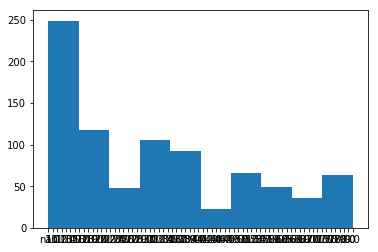

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(dist)

In [88]:
from sklearn.cluster import KMeans

In [89]:
data3=data2.drop('dist',axis=1)

In [90]:
from sklearn.metrics import silhouette_score
sse=[]
silh=[]
for i in range(2,6):
    kmclustering=KMeans(n_init=50)
    fit=kmclustering.fit(data3)
    silh.append(silhouette_score(data3,fit.labels_))
    sse.append(fit.inertia_)

In [91]:
for i,j in zip(sse,silh):
    print(i,'   ',j)

1011.60703693     0.183581806886
1012.09885196     0.182679608832
1011.5534996     0.18423064931
1011.4507844     0.182199936311


In [ ]:
from sklearn.cluster import AgglomerativeClustering
sse=[]
silh=[]
for i in range(2,6):
    kmclustering=KMeans(n_init=50)
    fit=kmclustering.fit(data3)
    silh.append(silhouette_score(data3,fit.labels_))
    sse.append(fit.inertia_)